In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sens_dist = [0., .1, .25, .5, 1.] # [mm]
fiber_type = {'Y11':0, 'B2':1}

# eff['sensor'][0 or 1] = list with efficiencies at different distances [%]
# 0: Y11
# 1: B2

# sens_eff = {
#     'PMT':([5.29, 5.35, 2.43, 1.99, 1.55], [3.85, 4.06, 1.96, 1.81, 1.54]),
#     'SiPM_Hamamatsu':([11.97, 12.71, 5.7, 3.69, 1.55], [13.18, 12.82, 5.73, 4.01, 1.93]),
# #     'SiPM_FBK_with_methacrylate_window':([1.56, 1.77, 1.55, 1.61, 1.45], [1.98, 2.08, 2.14, 2.00, 1.86]),
# #     'SiPM_FBK_without_methacrylate_window':([11.51, 5.64, 5.37, 4.22, 2.59], [14.39, 7.4, 6.27, 5.37, 3.54])
#     'SiPM_FBK':([11.51, 5.64, 5.37, 4.22, 2.59], [14.39, 7.4, 6.27, 5.37, 3.54])
# }

# Without optical gel
sens_eff = {
    'PMT':([5.31, 2.81, 2.03, 2., 1.54], [4.03, 1.86, 1.91, 1.47, 1.2]),
    'SiPM_Hamamatsu':([13.1, 5.85, 5.54, 3.15, 1.69], [12.38, 5.63, 4.88, 3.3, 1.55]),
    'SiPM_FBK':([11.7, 5.28, 4.62, 3.93, 2.48], [15.12, 6.62, 6.50, 4.83, 2.69])
}

In [3]:
sens_eff['PMT'][0]
sens_eff.items()

dict_items([('PMT', ([5.31, 2.81, 2.03, 2.0, 1.54], [4.03, 1.86, 1.91, 1.47, 1.2])), ('SiPM_Hamamatsu', ([13.1, 5.85, 5.54, 3.15, 1.69], [12.38, 5.63, 4.88, 3.3, 1.55])), ('SiPM_FBK', ([11.7, 5.28, 4.62, 3.93, 2.48], [15.12, 6.62, 6.5, 4.83, 2.69]))])

In [4]:
for sens, eff in sens_eff.items():
    for fib_type, fib in fiber_type.items():
        print(sens, eff[fib], fib_type)

PMT [5.31, 2.81, 2.03, 2.0, 1.54] Y11
PMT [4.03, 1.86, 1.91, 1.47, 1.2] B2
SiPM_Hamamatsu [13.1, 5.85, 5.54, 3.15, 1.69] Y11
SiPM_Hamamatsu [12.38, 5.63, 4.88, 3.3, 1.55] B2
SiPM_FBK [11.7, 5.28, 4.62, 3.93, 2.48] Y11
SiPM_FBK [15.12, 6.62, 6.5, 4.83, 2.69] B2


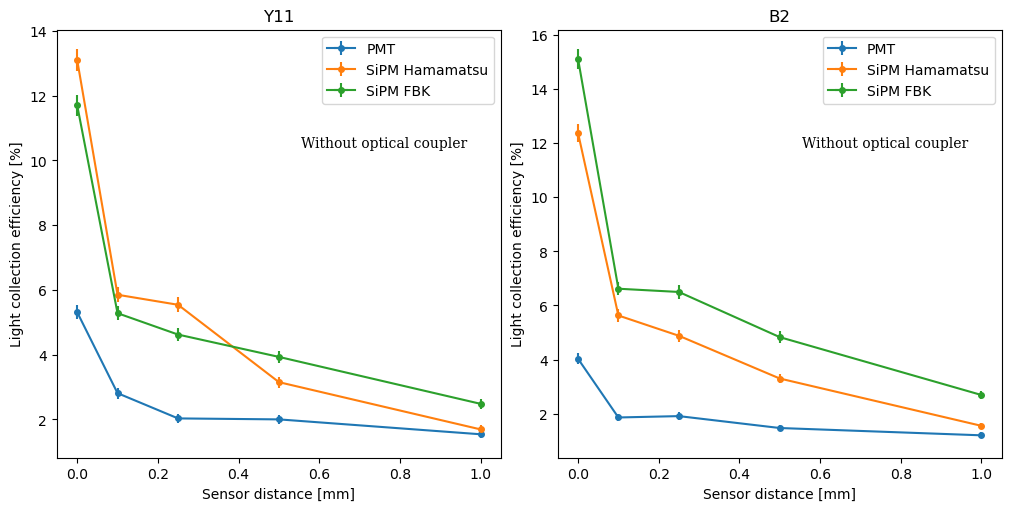

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True)

N = 1e4 # N events of the simulation

for sens, eff in sens_eff.items():
    for fib_type, fib in fiber_type.items():
        
        k = np.array(eff[fib])*N/100 # eff = (k/N)*100
        eff_err = 100*(1/N)*np.sqrt(k*(1-k/N)) # Binomial error
        
        dist_err = 0*np.ones(len(sens_dist))
        
        ax[fib].errorbar(sens_dist, eff[fib], eff_err, dist_err, '-o', 
                         markersize=4, label = sens.replace('_', ' '))
        
        ax[fib].set_title(fib_type)
        ax[fib].set_ylabel('Light collection efficiency [%]')
        ax[fib].set_xlabel('Sensor distance [mm]')
        
        ax[fib].text(0.55, .75, 'Without optical coupler', transform=ax[fib].transAxes,
            fontsize=10, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='none', pad=3.0))
        
        ax[fib].legend(loc = 'best')

In [6]:
sens.replace('_', ' ')

'SiPM FBK'